In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
foodDelivery = pd.read_csv("onlinedeliverydata.csv")
foodDelivery

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\r\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


# Encoding
To start, since the categories are Ordinal (Ordered categories of uneven intervals) we shall encode the different catergorical levels into numbers.

In [3]:
cleanup_nums = {"Gender": {"Male": 0, "Female": 1},
                "Marital Status": {"Single": 0, "Married": 1, "Prefer not to say": 2},
                "Occupation": {"Student": 0, "Employee": 1, "House wife": 2, "Self Employeed": 3},
                "Monthly Income": {"No Income": 0, "Below Rs.10000":1, "10001 to 25000": 2, "25001 to 50000": 3, "More than 50000": 4}, 
                "Educational Qualifications": {"Uneducated": 0, "School": 1, "Graduate": 2, "Post Graduate": 3, "Ph.D": 4},
#                 "Medium (P1)":
#                 "Medium (P2)"
#                 "Meal(P1)"
#                 "Meal(P2)"
#                 "Perference(P1)"
#                 "Perference(P2)"
                "Ease and convenient": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Time saving": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "More restaurant choices": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Easy Payment option": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "More Offers and Discount": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Good Food quality": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Good Tracking system": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Self Cooking": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Health Concern": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Late Delivery": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Poor Hygiene": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Bad past experience": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Unavailability": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Unaffordable": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Long delivery time": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Delay of delivery person getting assigned": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Delay of delivery person picking up food": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Wrong order delivered": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Missing item": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Order placed by mistake": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Influence of time": {"No": 0, "Maybe": 1, "Yes": 2},
                "Order Time": {"Anytime (Mon-Sun)": 0, "Weekdays (Mon-Fri)": 1, "Weekend (Sat & Sun)": 2},
                "Maximum wait time": {"15 minutes": 0, "30 minutes": 1, "45 minutes": 2, "60 minutes": 3, "More than 60 minutes": 4},
                "Residence in busy location": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly Agree": 4},
                "Google Maps Accuracy": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly Agree": 4},
                "Good Road Condition": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly Agree": 4},
                "Low quantity low time": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly Agree": 4},
                "Delivery person ability": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly Agree": 4},
                "Influence of rating": {"No": 0, "Maybe": 1, "Yes": 2},
                "Less Delivery time": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "High Quality of package": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Number of calls": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Politeness": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Freshness ": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Temperature": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Good Taste ": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Good Quantity": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Output": {"No": 0, "Yes": 1}
               }

In [4]:
foodDelivery = foodDelivery.replace(cleanup_nums)

In [5]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)
foodDelivery

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,1,0,0,0,3,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,2,2,1,3,2,2,2,2,2,3,3,3,3,3,3,3,3,1,Nil\r\n
1,24,1,0,0,1,2,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),4,4,4,4,4,2,3,4,4,3,4,4,4,4,4,4,4,4,4,4,2,0,1,4,2,1,0,3,2,4,4,4,4,4,4,4,4,1,Nil
2,22,0,0,0,1,3,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,4,4,4,2,2,1,2,1,2,2,3,3,3,3,3,3,3,4,3,2,2,0,2,3,4,2,2,3,2,2,4,3,4,4,2,4,3,1,"Many a times payment gateways are an issue, so..."
3,22,1,0,0,0,2,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),3,3,4,3,4,3,3,3,4,2,3,1,1,2,3,3,3,1,1,2,2,0,1,1,3,3,2,3,2,4,2,3,4,4,4,4,2,1,nil
4,22,0,0,0,1,3,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),3,3,3,3,3,2,2,3,4,4,3,4,3,1,4,4,2,2,2,1,2,2,1,3,3,3,3,3,2,2,2,3,2,2,2,4,4,1,NIL
5,27,1,1,1,4,3,2,12.9299,77.6848,560103,Food delivery apps,Walk-in,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),3,3,2,3,3,2,3,1,2,3,3,3,3,3,4,4,4,3,4,4,2,0,2,2,3,2,2,2,2,2,4,4,4,4,4,4,4,1,NIL
6,22,0,0,0,0,2,3,12.9770,77.5773,560009,Food delivery apps,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),4,4,3,4,3,2,3,1,3,1,3,1,4,0,2,1,1,4,4,4,0,0,2,3,4,1,3,4,2,4,4,0,2,4,4,4,4,1,Nil
7,24,1,0,0,0,3,3,12.9828,77.6131,560042,Food delivery apps,Direct call,Dinner,Dinner,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,4,3,3,3,3,3,3,3,3,3,2,2,2,2,3,3,3,2,3,3,2,2,2,3,3,3,2,1,1,3,2,3,1,2,3,4,4,1,NIL
8,23,1,0,0,0,3,2,12.9766,77.5993,560001,Food delivery apps,Direct call,Dinner,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),3,3,4,3,3,2,3,3,3,2,3,2,2,1,3,3,3,3,3,4,2,0,1,1,1,2,3,3,1,2,2,2,2,2,2,2,2,1,Nil
9,23,1,0,0,0,3,4,12.9854,77.7081,560048,Food delivery apps,Walk-in,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),2,2,2,2,2,2,2,3,3,2,2,2,2,2,3,3,3,2,3,3,2,2,2,3,3,3,1,1,2,3,4,3,3,3,3,4,4,1,Nil


# Correlation matrix
Pearson's correlation is used to evaluate the linear relationship between two continuous variables. As our data points are ranked ordinal values, we cannot use Pearson's correlation. 

Instead, Spearman's coefficient is used to determine the relationship between variables since it is based on the ranked values for each variable instead of continuous raw data.

In [6]:
corr = foodDelivery.corr(method = "spearman")

<AxesSubplot:>

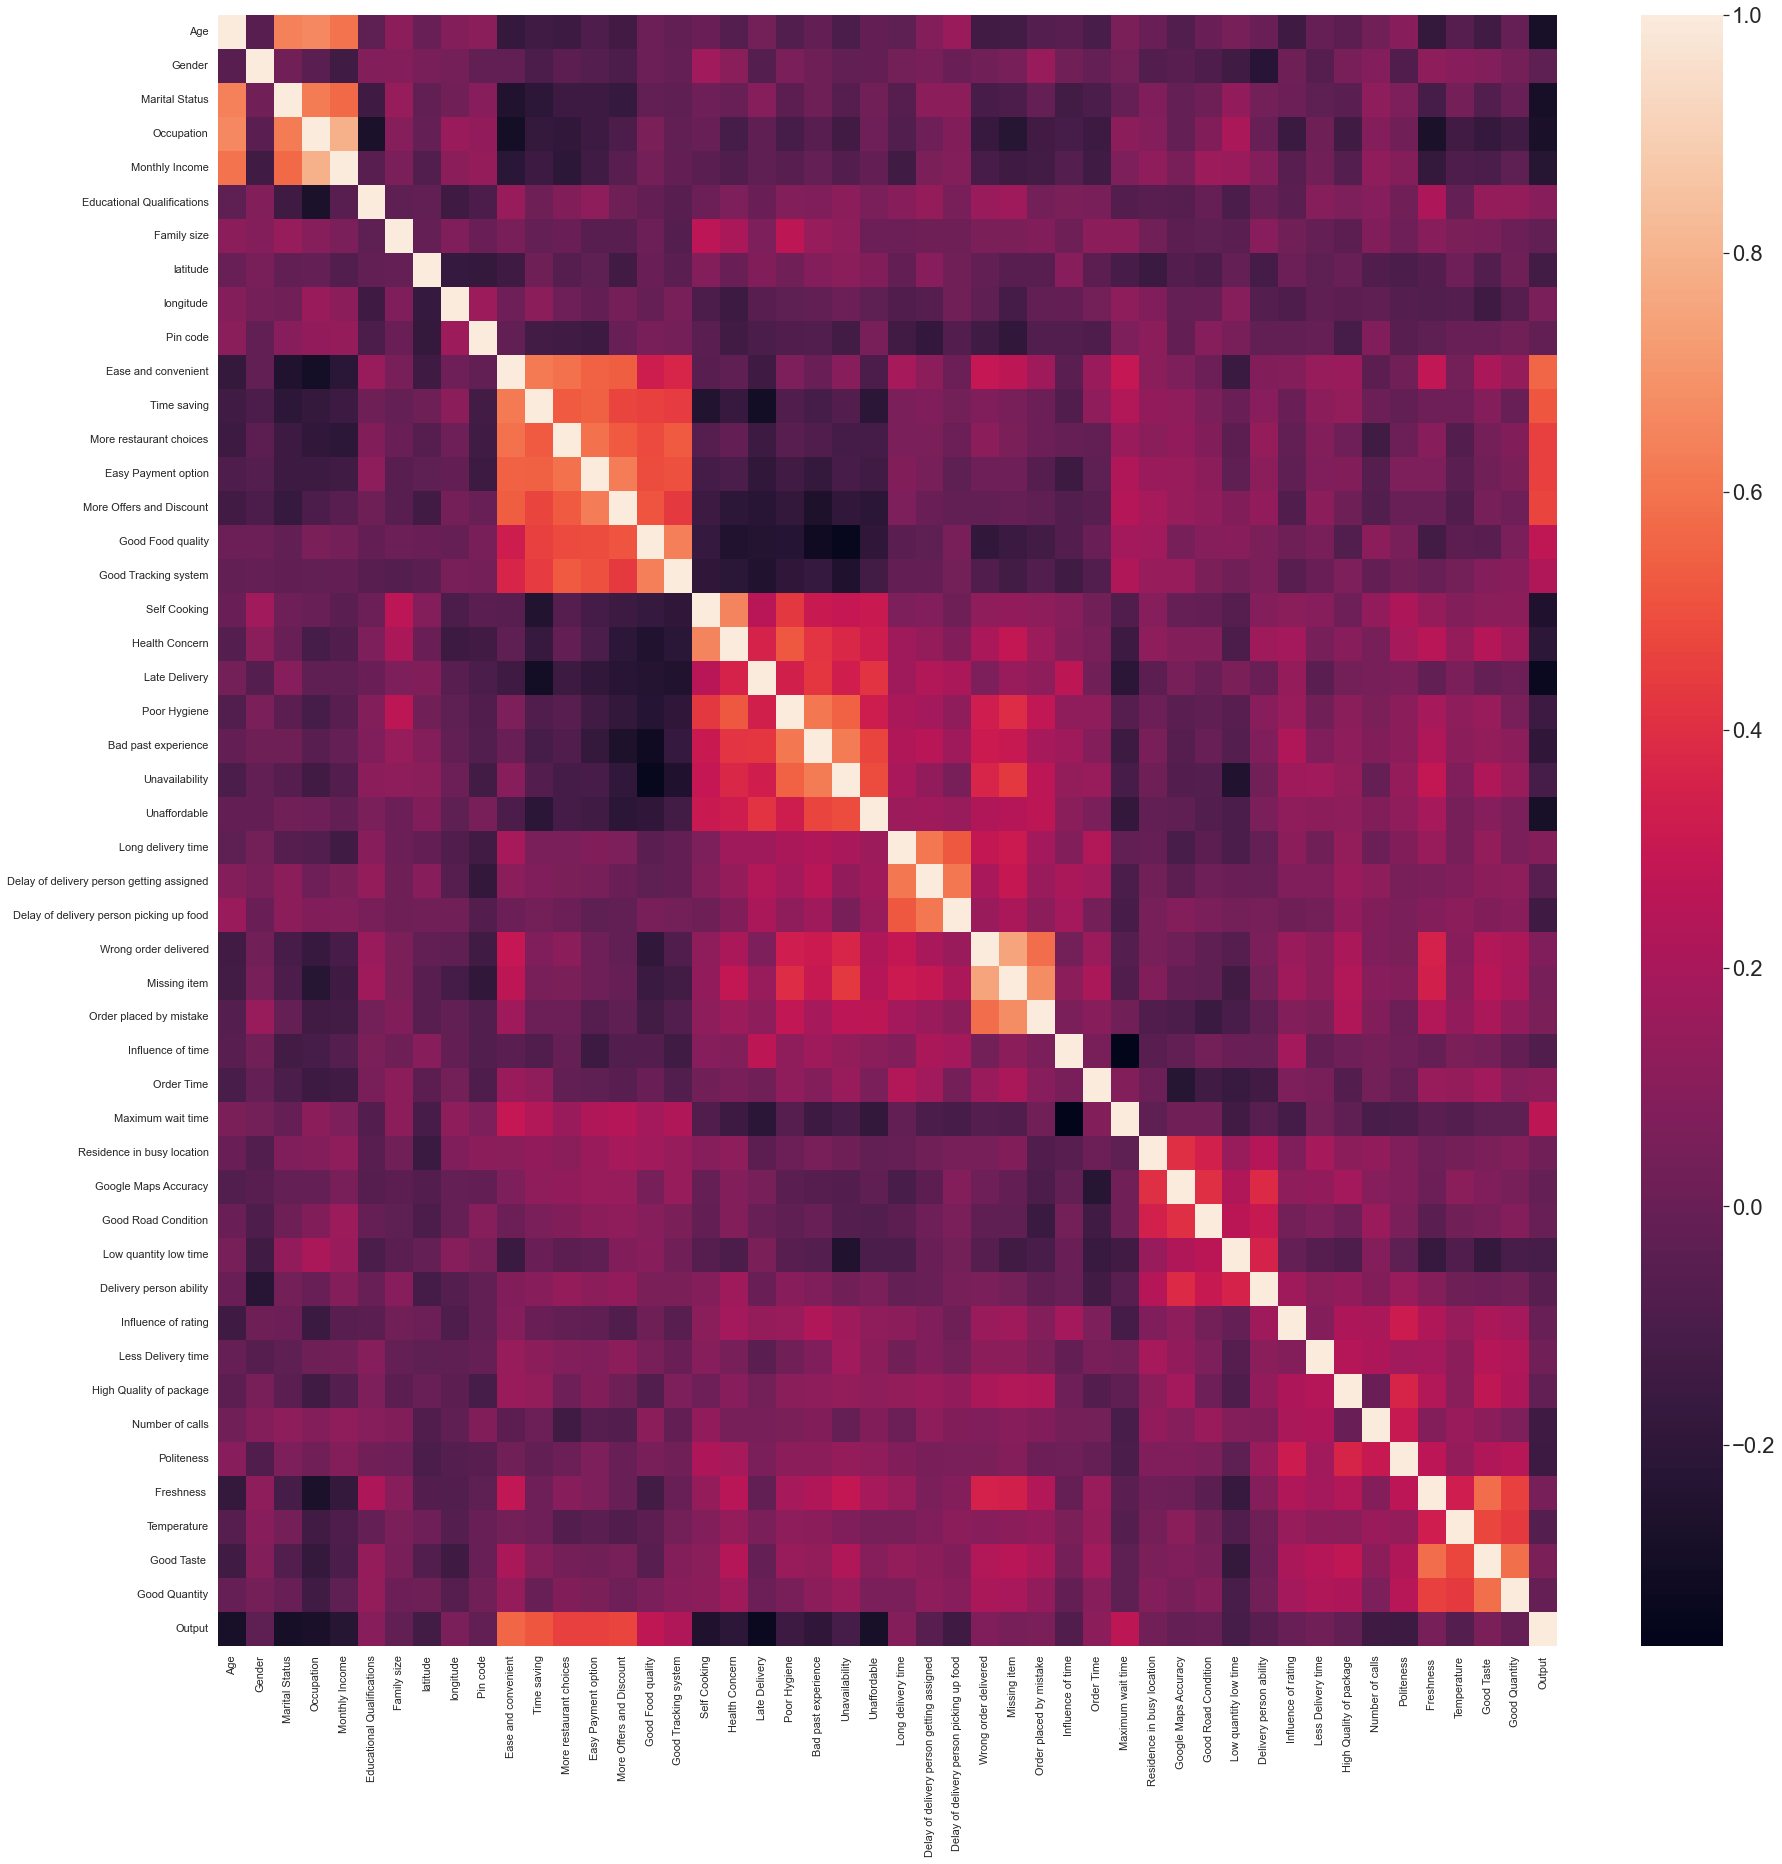

In [7]:
fig, ax = plt.subplots(figsize=(30,30))
sb.set(font_scale = 2.0)
sb.heatmap(corr, ax = ax)

From the heat map, we can observe that the following factors are has the most positive correlation with Output compared to the rest of the other factors.
- Ease and Convinient
- Time Saving
- More restaurant choices
- Easy Payment option
- More Offers and Discount



# Regression Model
To answer our question, we shall use logistic regression and Random Forest regression models 

In [8]:
Output = foodDelivery['Output']
Output

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     0
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     0
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     0
89     0
90     0
91     0
92     1
93     1
94     1
95     1
96     1
97     1
98     0
99     0
100    0
101    1
102    1
103    1
104    1
105    0
106    0
107    1
108    0
109    1
110    1
1

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9225806451612903
Mean Squared Error (MSE) 	: 0.07741935483870968
Root Mean Squared Error (RMSE) 	: 0.27824333745610097

False Positive Rate 		: 0.21739130434782608
True Positive Rate 		: 0.9626556016597511

Accuracy: 0.9225806451612903
Precision: 0.9392712550607287
Recall: 0.9626556016597511



Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9102564102564102
Mean Squared Error (MSE) 	: 0.08974358974358974
Root Mean Squared Error (RMSE) 	: 0.29957234475763905

False Positive Rate 		: 0.2222222222222222
True Positive Rate 		: 0.95

Accuracy: 0.9102564102564102
Precision: 0.9344262295081968
Recall: 0.95


<AxesSubplot:>

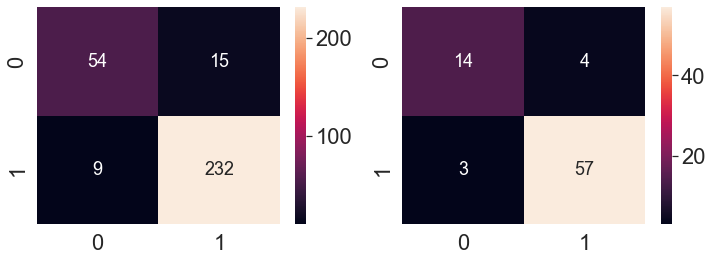

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler


Input = foodDelivery.drop(['Output', "Medium (P1)", "Medium (P2)", "Meal(P1)", "Meal(P2)", "Perference(P1)", "Perference(P2)", "Reviews"], axis = 1)
sc = StandardScaler()
Input = sc.fit_transform(Input)
Output = foodDelivery['Output']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(Input, Output, test_size = 0.20, random_state = 0)
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_log, y_train_log)

y_train_pred_log = logreg.predict(X_train_log)
y_test_pred_log = logreg.predict(X_test_log)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_train_log, y_train_log))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_train_log, y_train_pred_log))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_log)))
print()


TN_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[0][0]
FP_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[0][1]
FN_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[1][0]
TP_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[1][1]

FPRate_train_log = FP_train_log / (TN_train_log + FP_train_log)
FNRate_train_log = FN_train_log / (TP_train_log + FN_train_log)
print("False Positive Rate \t\t:", FPRate_train_log)
print("True Positive Rate \t\t:", 1 - FNRate_train_log)

print()

print("Accuracy:",metrics.accuracy_score(y_train_log, y_train_pred_log))
print("Precision:",metrics.precision_score(y_train_log, y_train_pred_log))
print("Recall:",metrics.recall_score(y_train_log, y_train_pred_log))

print()
print()
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test_log, y_test_log))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_test_log, y_test_pred_log))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_test_log, y_test_pred_log)))
print()



# Check the Goodness of Fit (on Test Data)
TN_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[0][0]
FP_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[0][1]
FN_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[1][0]
TP_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[1][1]

FPRate_test_log = FP_test_log / (TN_test_log + FP_test_log)
FNRate_test_log = FN_test_log / (TP_test_log + FN_test_log)
print("False Positive Rate \t\t:", FPRate_test_log)
print("True Positive Rate \t\t:", 1 - FNRate_test_log)
print()

print("Accuracy:",metrics.accuracy_score(y_test_log, y_test_pred_log))
print("Precision:",metrics.precision_score(y_test_log, y_test_pred_log))
print("Recall:",metrics.recall_score(y_test_log, y_test_pred_log))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(metrics.confusion_matrix(y_train_log, y_train_pred_log),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(metrics.confusion_matrix(y_test_log, y_test_pred_log), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])






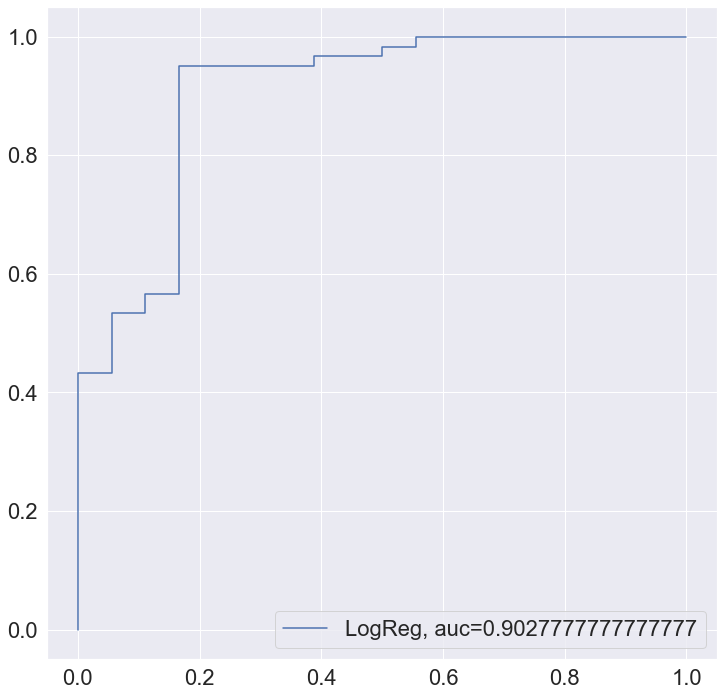

In [10]:
y_pred_proba_log = logreg.predict_proba(X_test_log)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_log, y_pred_proba_log)
auc = metrics.roc_auc_score(y_test_log, y_pred_proba_log)

plt.figure(figsize = (12, 12))
plt.plot(fpr,tpr,label="LogReg, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Tuning Hyperparameters

In [11]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# tuning the hyperparameters for Logistic Regression
# hyperparameters: solvers, penalty and c-values
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag','saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_log, y_train_log)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Best: 0.906452 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.843011 (0.062735) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.843011 (0.062735) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.851613 (0.058065) with: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
0.860215 (0.056079) with: {'C': 100, 'penalty': 'none', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.843011 (0.062735) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.860215 (0.056079) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.843011 (0.062735) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.843011 (0.062735) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.843011 (0.062735) with: {'

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9129032258064517
Mean Squared Error (MSE) 	: 0.08709677419354839
Root Mean Squared Error (RMSE) 	: 0.2951216261027788

False Positive Rate 		: 0.2753623188405797
True Positive Rate 		: 0.966804979253112

Accuracy: 0.9129032258064517
Precision: 0.9246031746031746
Recall: 0.966804979253112



Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9102564102564102
Mean Squared Error (MSE) 	: 0.08974358974358974
Root Mean Squared Error (RMSE) 	: 0.29957234475763905

False Positive Rate 		: 0.3333333333333333
True Positive Rate 		: 0.9833333333333333

Accuracy: 0.9102564102564102
Precision: 0.9076923076923077
Recall: 0.9833333333333333


<AxesSubplot:>

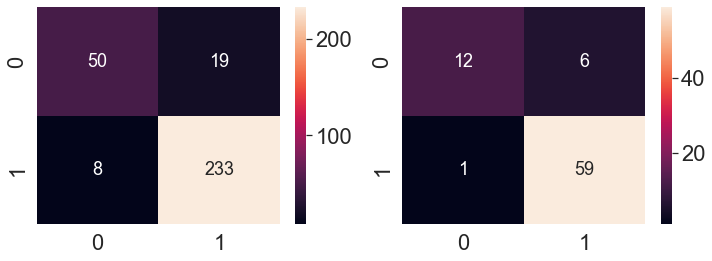

In [12]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# # from sklearn.metrics import mean_squared_error
# # from sklearn.metrics import confusion_matrix
# # from sklearn.metrics import roc_curve
# # from sklearn.metrics import roc_auc_score
# from sklearn.preprocessing import StandardScaler


# Input = foodDelivery.drop(['Output', "Medium (P1)", "Medium (P2)", "Meal(P1)", "Meal(P2)", "Perference(P1)", "Perference(P2)", "Reviews"], axis = 1)
# sc = StandardScaler()
# Input = sc.fit_transform(Input)
# Output = foodDelivery['Output']

# X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(Input, Output, test_size = 0.20, random_state = 0)
logreg = LogisticRegression(random_state=0, C=0.1, penalty = 'l1', solver='liblinear')
logreg.fit(X_train_log, y_train_log)

y_train_pred_log = logreg.predict(X_train_log)
y_test_pred_log = logreg.predict(X_test_log)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_train_log, y_train_log))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_train_log, y_train_pred_log))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_log)))
print()


TN_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[0][0]
FP_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[0][1]
FN_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[1][0]
TP_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[1][1]

FPRate_train_log = FP_train_log / (TN_train_log + FP_train_log)
FNRate_train_log = FN_train_log / (TP_train_log + FN_train_log)
print("False Positive Rate \t\t:", FPRate_train_log)
print("True Positive Rate \t\t:", 1 - FNRate_train_log)

print()

print("Accuracy:",metrics.accuracy_score(y_train_log, y_train_pred_log))
print("Precision:",metrics.precision_score(y_train_log, y_train_pred_log))
print("Recall:",metrics.recall_score(y_train_log, y_train_pred_log))

print()
print()
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test_log, y_test_log))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_test_log, y_test_pred_log))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_test_log, y_test_pred_log)))
print()



# Check the Goodness of Fit (on Test Data)
TN_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[0][0]
FP_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[0][1]
FN_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[1][0]
TP_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[1][1]

FPRate_test_log = FP_test_log / (TN_test_log + FP_test_log)
FNRate_test_log = FN_test_log / (TP_test_log + FN_test_log)
print("False Positive Rate \t\t:", FPRate_test_log)
print("True Positive Rate \t\t:", 1 - FNRate_test_log)
print()

print("Accuracy:",metrics.accuracy_score(y_test_log, y_test_pred_log))
print("Precision:",metrics.precision_score(y_test_log, y_test_pred_log))
print("Recall:",metrics.recall_score(y_test_log, y_test_pred_log))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(metrics.confusion_matrix(y_train_log, y_train_pred_log),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(metrics.confusion_matrix(y_test_log, y_test_pred_log), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])






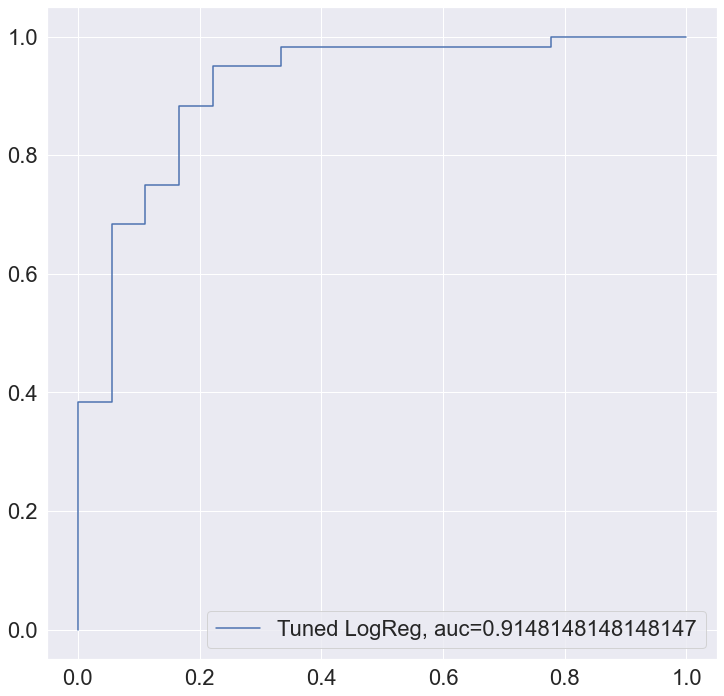

In [13]:
y_pred_proba_log = logreg.predict_proba(X_test_log)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_log, y_pred_proba_log)
auc = metrics.roc_auc_score(y_test_log, y_pred_proba_log)

plt.figure(figsize = (12, 12))
plt.plot(fpr,tpr,label="Tuned LogReg, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# RandomForestClassifier

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0
Root Mean Squared Error (RMSE) 	: 0.0

False Positive Rate 		: 0.0
True Positive Rate 		: 1.0

Accuracy: 1.0
Precision: 1.0
Recall: 1.0



Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2948717948717949
Mean Squared Error (MSE) 	: 0.0641025641025641
Root Mean Squared Error (RMSE) 	: 0.25318484177091666

False Positive Rate 		: 0.2222222222222222
True Positive Rate 		: 0.9833333333333333

Accuracy: 0.9358974358974359
Precision: 0.9365079365079365
Recall: 0.9833333333333333


<AxesSubplot:>

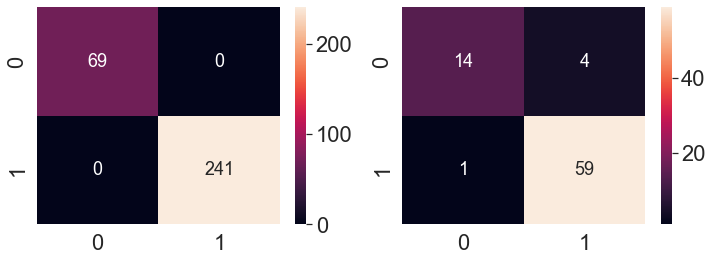

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score


Input = foodDelivery.drop(['Output', "Medium (P1)", "Medium (P2)", "Meal(P1)", "Meal(P2)", "Perference(P1)", "Perference(P2)", "Reviews"], axis = 1)
Output = foodDelivery['Output']

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(Input, Output, test_size = 0.20, random_state = 0)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_forest, y_train_forest)

y_train_pred_forest = forest.predict(X_train_forest)
y_test_pred_forest = forest.predict(X_test_forest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", forest.score(X_train_forest, y_train_forest))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_train_forest, y_train_pred_forest))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_train_forest, y_train_pred_forest)))
print()


TN_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[0][0]
FP_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[0][1]
FN_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[1][0]
TP_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[1][1]

FPRate_train_forest = FP_train_forest / (TN_train_forest + FP_train_forest)
FNRate_train_forest = FN_train_forest / (TP_train_forest + FN_train_forest)
print("False Positive Rate \t\t:", FPRate_train_forest)
print("True Positive Rate \t\t:", 1 - FNRate_train_forest)

print()

print("Accuracy:",metrics.accuracy_score(y_train_forest, y_train_pred_forest))
print("Precision:",metrics.precision_score(y_train_forest, y_train_pred_forest))
print("Recall:",metrics.recall_score(y_train_forest, y_train_pred_forest))

print()
print()
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test_forest, y_test_forest))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_test_forest, y_test_pred_forest))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_test_forest, y_test_pred_forest)))
print()



# Check the Goodness of Fit (on Test Data)
TN_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[0][0]
FP_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[0][1]
FN_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[1][0]
TP_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[1][1]

FPRate_test_forest = FP_test_forest / (TN_test_forest + FP_test_forest)
FNRate_test_forest = FN_test_forest / (TP_test_forest + FN_test_forest)
print("False Positive Rate \t\t:", FPRate_test_forest)
print("True Positive Rate \t\t:", 1 - FNRate_test_forest)
print()

print("Accuracy:",metrics.accuracy_score(y_test_forest, y_test_pred_forest))
print("Precision:",metrics.precision_score(y_test_forest, y_test_pred_forest))
print("Recall:",metrics.recall_score(y_test_forest, y_test_pred_forest))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(metrics.confusion_matrix(y_train_forest, y_train_pred_forest),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(metrics.confusion_matrix(y_test_forest, y_test_pred_forest), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])






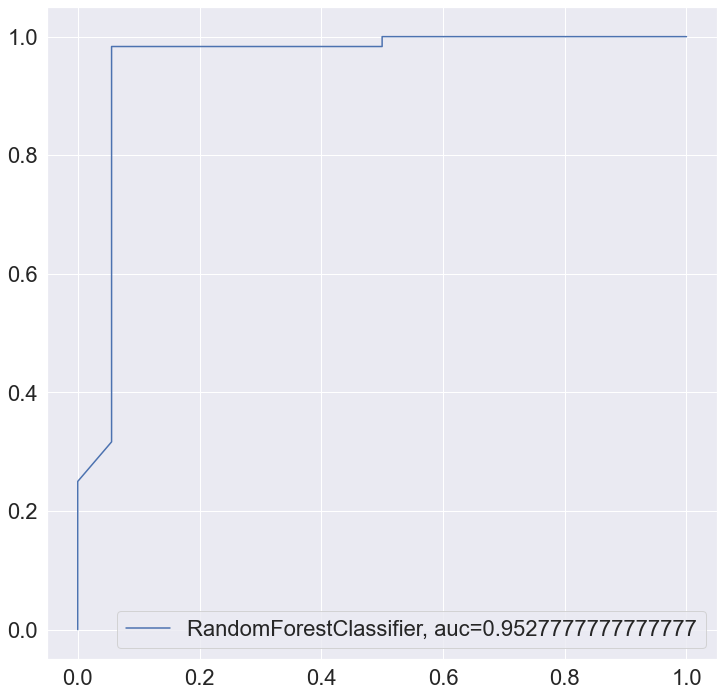

In [19]:
y_pred_proba_forest = forest.predict_proba(X_test_forest)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_forest, y_pred_proba_forest)
auc = metrics.roc_auc_score(y_test_forest, y_pred_proba_forest)

plt.figure(figsize = (12, 12))
plt.plot(fpr,tpr,label="RandomForestClassifier, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Tuning Hyperparameters

In [16]:
# tuning the hyperparameters for RandomForestClassifier
# hyperparameters: n_estimators, max_features
# need to experiment with more hyperparameters
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=forest, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_log, y_train_log)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.935484 using {'max_features': 'sqrt', 'n_estimators': 100}
0.920430 (0.040576) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.935484 (0.036305) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.934409 (0.035808) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.922581 (0.039596) with: {'max_features': 'log2', 'n_estimators': 10}
0.934409 (0.033815) with: {'max_features': 'log2', 'n_estimators': 100}
0.933333 (0.036242) with: {'max_features': 'log2', 'n_estimators': 1000}


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0
Root Mean Squared Error (RMSE) 	: 0.0

False Positive Rate 		: 0.0
True Positive Rate 		: 1.0

Accuracy: 1.0
Precision: 1.0
Recall: 1.0



Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2948717948717949
Mean Squared Error (MSE) 	: 0.0641025641025641
Root Mean Squared Error (RMSE) 	: 0.25318484177091666

False Positive Rate 		: 0.2222222222222222
True Positive Rate 		: 0.9833333333333333

Accuracy: 0.9358974358974359
Precision: 0.9365079365079365
Recall: 0.9833333333333333


<AxesSubplot:>

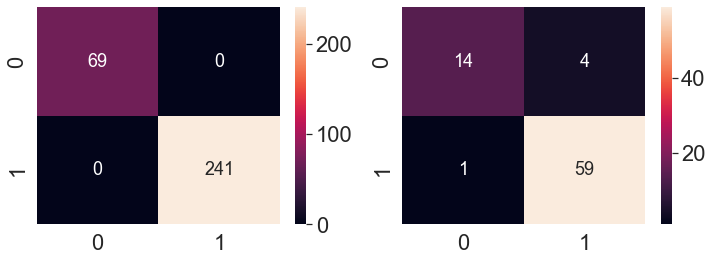

In [17]:
forest = RandomForestClassifier(max_features='sqrt', n_estimators=100,random_state=0)
forest.fit(X_train_forest, y_train_forest)

y_train_pred_forest = forest.predict(X_train_forest)
y_test_pred_forest = forest.predict(X_test_forest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", forest.score(X_train_forest, y_train_forest))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_train_forest, y_train_pred_forest))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_train_forest, y_train_pred_forest)))
print()


TN_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[0][0]
FP_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[0][1]
FN_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[1][0]
TP_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[1][1]

FPRate_train_forest = FP_train_forest / (TN_train_forest + FP_train_forest)
FNRate_train_forest = FN_train_forest / (TP_train_forest + FN_train_forest)
print("False Positive Rate \t\t:", FPRate_train_forest)
print("True Positive Rate \t\t:", 1 - FNRate_train_forest)

print()

print("Accuracy:",metrics.accuracy_score(y_train_forest, y_train_pred_forest))
print("Precision:",metrics.precision_score(y_train_forest, y_train_pred_forest))
print("Recall:",metrics.recall_score(y_train_forest, y_train_pred_forest))

print()
print()
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test_forest, y_test_forest))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_test_forest, y_test_pred_forest))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_test_forest, y_test_pred_forest)))
print()



# Check the Goodness of Fit (on Test Data)
TN_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[0][0]
FP_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[0][1]
FN_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[1][0]
TP_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[1][1]

FPRate_test_forest = FP_test_forest / (TN_test_forest + FP_test_forest)
FNRate_test_forest = FN_test_forest / (TP_test_forest + FN_test_forest)
print("False Positive Rate \t\t:", FPRate_test_forest)
print("True Positive Rate \t\t:", 1 - FNRate_test_forest)
print()

print("Accuracy:",metrics.accuracy_score(y_test_forest, y_test_pred_forest))
print("Precision:",metrics.precision_score(y_test_forest, y_test_pred_forest))
print("Recall:",metrics.recall_score(y_test_forest, y_test_pred_forest))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(metrics.confusion_matrix(y_train_forest, y_train_pred_forest),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(metrics.confusion_matrix(y_test_forest, y_test_pred_forest), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])




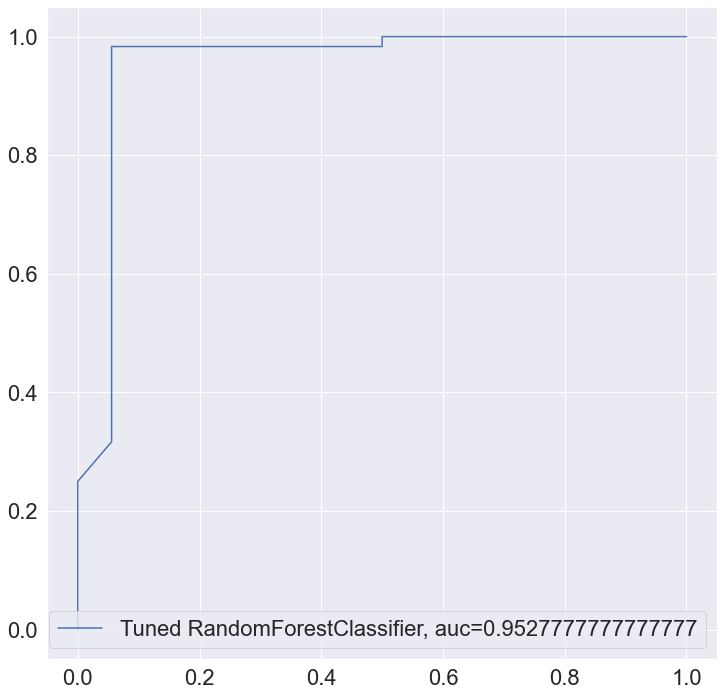

In [20]:
y_pred_proba_forest = forest.predict_proba(X_test_forest)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_forest, y_pred_proba_forest)
auc = metrics.roc_auc_score(y_test_forest, y_pred_proba_forest)

plt.figure(figsize = (12, 12))
plt.plot(fpr,tpr,label="Tuned RandomForestClassifier, auc="+str(auc))
plt.legend(loc=4)
plt.show()